In [1]:
import numpy as np
from numpy import linalg as LA
from ncon import ncon
import matplotlib.pyplot as plt

In [13]:
# SVD

d = 2
A = np.random.rand(d,d,d)
print(A)
Am = A.reshape(d**2,d)
Um,Sm,Vh = LA.svd(Am, full_matrices=False)
U = Um.reshape(d,d,d)
S = np.diag(Sm)
print(U)
print(S)
print(Vh)
Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])
dA = LA.norm(Af-A)
dA

[[[0.6161293  0.12134896]
  [0.51802025 0.18696343]]

 [[0.05542994 0.15655452]
  [0.51867226 0.41626459]]]
[[[-0.58080993  0.58734853]
  [-0.52228947  0.18932258]]

 [[-0.1104895  -0.46926787]
  [-0.61454504 -0.63163781]]]
[[1.05044787 0.        ]
 [0.         0.25313905]]
[[-0.90750094 -0.42005005]
 [ 0.42005005 -0.90750094]]


2.172217384091364e-16

In [20]:
# frobenius norm

d = 10
A = np.random.rand(d,d,d,d,d)
cvec = [k+1 for k in range(np.ndim(A))]
frobA0 = np.sqrt(ncon([A, np.conj(A)], [cvec,cvec]))
print(frobA0)
frobA1 = np.sqrt(sum(abs(A.flatten()**2)))
print(frobA1)
frobA2 = LA.norm(A)
print(frobA2)

182.4676586510812
182.46765865108063
182.4676586510812


In [41]:
# Approximation by truncation

d = 10
A = np.random.rand(d,d,d,d,d)
U1,S1,V1 = LA.svd(A.reshape(d**3, d**2), full_matrices = False)
U = U1.reshape(d,d,d,d**2)
V = V1.reshape(d**2,d,d)
S = np.diag(S1)

for i in range(d+1):
    V_t = V[:i,:,:]
    S_t = S[:i,:i]
    U_t = U[:,:,:,:i]
    B = ncon([U_t, S_t, V_t], [[-1,-2,-3,1],[1,2],[2,-4,-5]])
    eps_AB = LA.norm(A-B) / LA.norm(A)
    print(eps_AB)

A_svd = ncon([U,S,V], [[-1,-2,-3,1],[1,2],[2,-4,-5]])
LA.norm(A_svd - A)/LA.norm(A)

1.0
0.49549840413784807
0.49123583746254285
0.48696417054490126
0.4827225365129858
0.4786068428962808
0.47451785096139937
0.47043234358701647
0.4664502038946529
0.46248100936921127
0.45849350038656095


2.8298057141365386e-15

In [5]:
# effective rank

d = 500
A = (np.diag(np.ones(d-1),-1) + np.diag(np.ones(d-1),1))
A = A / LA.norm(A)

eps = 1e-2
U,S,V = LA.svd(A)
#r_del = sum(S > eps)
r_del = 0
while(S[r_del] > eps):
    r_del += 1
    
epsilon = np.sqrt(sum(S[r_del:]**2))

print("eps = " + str(epsilon), "r_del = " + str(r_del))

eps = 0.040409915684386455 r_del = 450


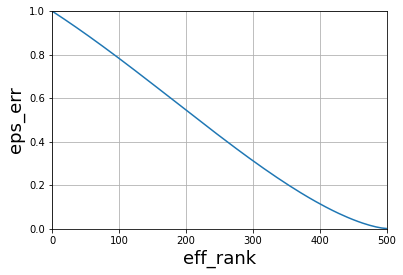

In [24]:
d = 500
A = (np.diag(np.ones(d-1),-1) + np.diag(np.ones(d-1),1))
A = A / LA.norm(A)
U,S,V = LA.svd(A)
eps_AB = []
for i in range(d):
    V_t = V[:i,:]
    S_t = np.diag(S[:i])
    U_t = U[:,:i]
    B = ncon([U_t, S_t, V_t], [[-1,1],[1,2],[2,-2]])
    eps_AB.append(LA.norm(A-B) / LA.norm(A))

x = [i for i in range(d)]
plt.plot(x, eps_AB)
plt.ylabel("eps_err", fontsize=18)
plt.xlabel("eff_rank", fontsize=18)
plt.xlim([0,d])
plt.ylim([0,1])
plt.grid(True)
plt.show()

r_del = 3


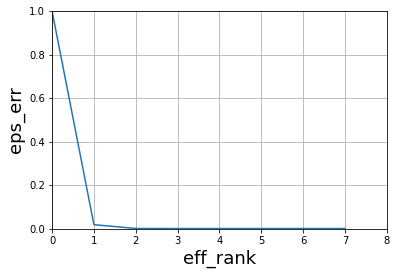

In [2]:
d1 = 10
d2 = 8
A = []
for i in range(d1):
    for j in range(d1):
        for l in range(d2):
            for k in range(d2):
                A.append(np.sqrt(i+2*j+3*k+4*l+10))
A = np.array(A)
A = A.reshape(d1,d1,d2,d2)
A = A / LA.norm(A)
U_1,S_1,V_1 = LA.svd(A.reshape(d1**2, d2**2), full_matrices=False)
U = U_1.reshape(d1,d1,d2**2)
V = V_1.reshape(d2**2,d2,d2)

eps = 1e-4
r_del = 0
while(S_1[r_del] > eps):
    r_del += 1    
epsilon = np.sqrt(sum(S_1[r_del:]**2))
print("r_del = " + str(r_del))

eps_AB = []
for i in range(d2):
    V_t = V[:i,:,:]
    S_t = np.diag(S_1[:i])
    U_t = U[:,:,:i]
    B = ncon([U_t, S_t, V_t], [[-1,-2,1],[1,2],[2,-3,-4]])
    eps_AB.append(LA.norm(A-B) / LA.norm(A))

x = [i for i in range(d2)]
plt.plot(x, eps_AB)
plt.ylabel("eps_err", fontsize=18)
plt.xlabel("eff_rank", fontsize=18)
plt.xlim([0,d2])
plt.ylim([0,1])
plt.grid(True)
plt.show()